In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
np.random.seed(0)

## Data loading

In [154]:
cycleA = pd.read_csv("Data/Chickens data/CycleA-Data301022.csv", sep=";")
cycleB = pd.read_csv("Data/Chickens data/CycleB-Data301022.csv", sep=";")
meteorological_data = pd.read_csv("Data/Meteorological data/RW_20221107172813_515881_5121_1.csv", sep=",")

## Data cleaning

In [155]:
# removing rows with Nan values from chickens data
cycleA = cycleA.dropna()
cycleB = cycleB.dropna()

# removing rows with non valid data from meteorological data
meteorological_data = meteorological_data[meteorological_data["Average_daily_value"] != -999.0]

# removing "%" value from chickens data
cycleA["% laied"] = cycleA["% laied"].str.rstrip("%").astype(float)
cycleB["% laied"] = cycleB["% laied"].str.rstrip("%").astype(float)

## Data preview

### Cycle A

In [156]:
cycleA.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consumption (gr),Feed Consumption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
11,19/07/2018,4.0,42123.0,18/08/2018,0,0.00,86.5,71.5,18/08/2018,43200,0
16,19/07/2018,12.0,42071.0,23/08/2018,21660,51.48,89.5,74.5,23/08/2018,43200,0
20,19/07/2018,6.0,42049.0,27/08/2018,26370,62.71,94.0,87.5,27/08/2018,97680,0
23,19/07/2018,7.0,42031.0,30/08/2018,26270,62.50,100.0,87.0,30/08/2018,79710,0
24,19/07/2018,6.0,42025.0,31/08/2018,25920,61.68,101.5,89.5,31/08/2018,25050,0


### Cycle B

In [157]:
cycleB.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consumption (gr),Feed Consumption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
0,09/08/2020,1.0,42215.0,04/09/2020,1470.0,3.48,110.0,81.0,04/09/2020,1470.0,0.0
6,09/08/2020,3.0,42209.0,10/09/2020,0.0,0.00,106.0,83.0,10/09/2020,31140.0,0.0
12,09/08/2020,8.0,42196.0,16/09/2020,23670.0,56.10,117.0,90.0,16/09/2020,120420.0,0.0
13,09/08/2020,6.0,42190.0,17/09/2020,25920.0,61.44,118.0,99.0,17/09/2020,25050.0,0.0
14,09/08/2020,2.0,42188.0,18/09/2020,27450.0,65.07,113.0,94.0,18/09/2020,26610.0,0.0


### Meteorological data

In [158]:
meteorological_data.head()

,Sensor_ID,Date,Average_daily_value,Minimum_average_hourly_value,Maximum_average_hourly_value
0,5121,2018/01/01,3.0,1.1,4.2
1,5121,2018/01/02,5.2,1.1,12.3
2,5121,2018/01/03,2.4,-0.9,5.1
3,5121,2018/01/04,4.8,2.5,9.1
4,5121,2018/01/05,4.0,-1.1,8.5


## Data join: chicken's data with meteorological data

In [159]:
weather_join_chickens_a = cycleA.copy()
weather_join_chickens_b = cycleA.copy()

weather_join_chickens_a['Average_daily_value'] = meteorological_data['Average_daily_value']
weather_join_chickens_b['Average_daily_value'] = meteorological_data['Average_daily_value']

## Data normalization

In [160]:
# apply min-max normalization techniques

for column in weather_join_chickens_a:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling"):
        weather_join_chickens_a[column] = (weather_join_chickens_a[column] - weather_join_chickens_a[column].min()) / (weather_join_chickens_a[column].max() - weather_join_chickens_a[column].min())
        
for column in weather_join_chickens_b:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling"):
        weather_join_chickens_b[column] = (weather_join_chickens_b[column] - weather_join_chickens_b[column].min()) / (weather_join_chickens_b[column].max() - weather_join_chickens_b[column].min())

## Data inspection

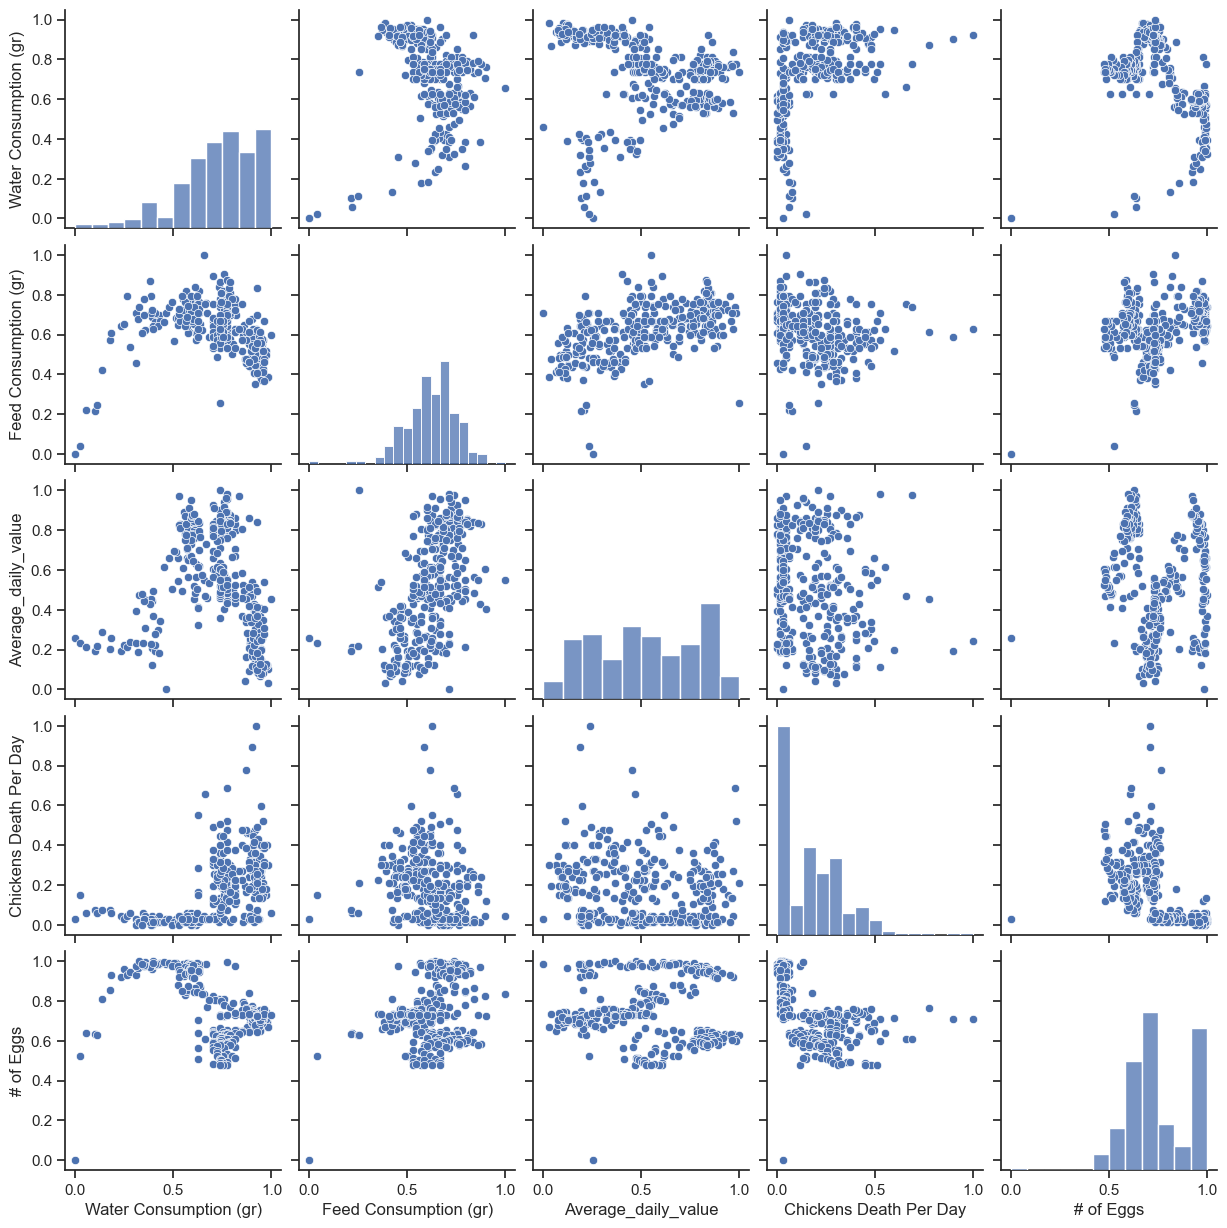

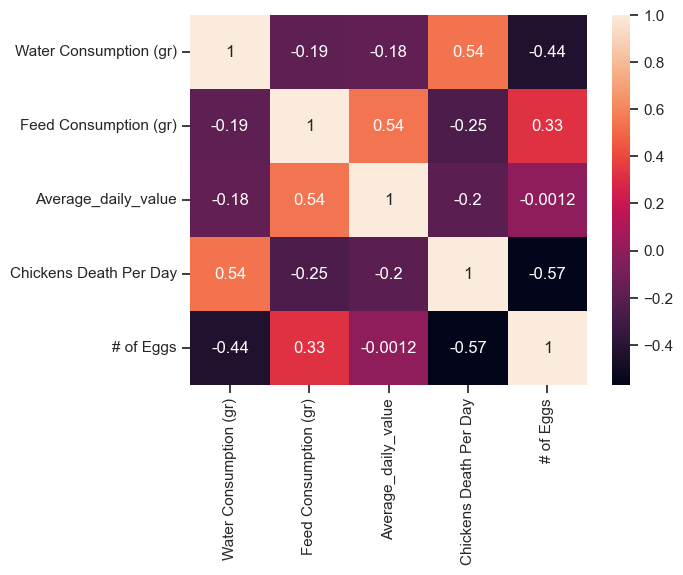

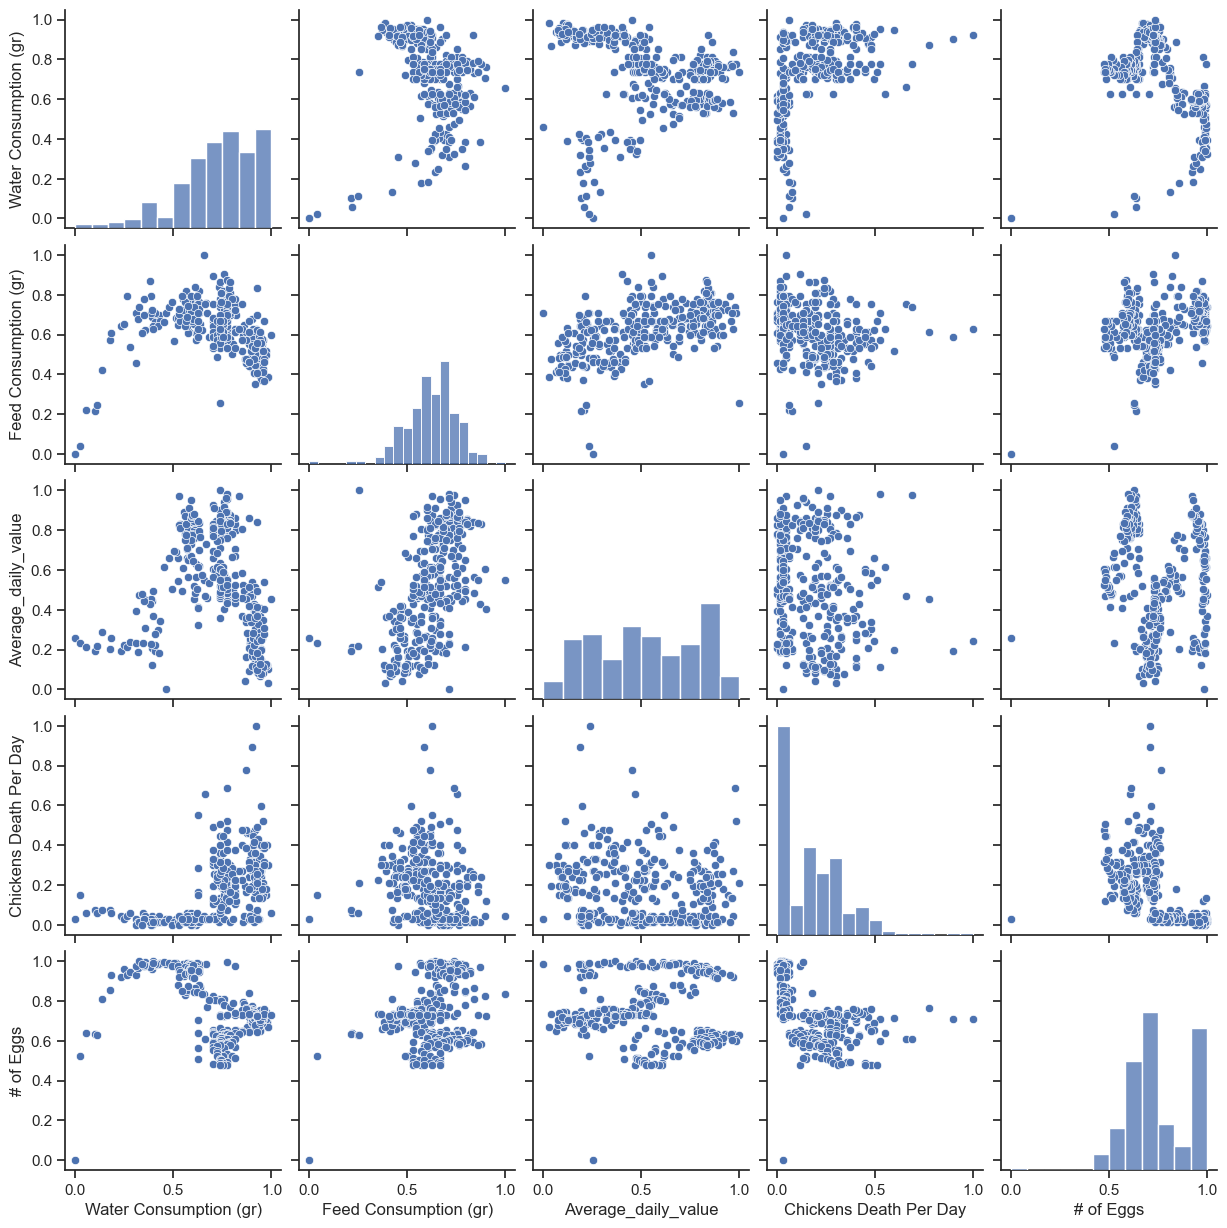

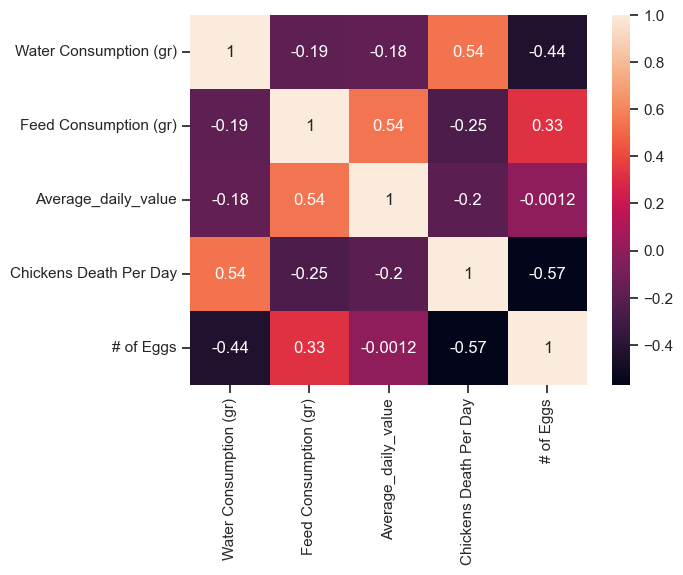

In [161]:
# input (x) and output (y) features
x_features = ["Water Consumption (gr)", "Feed Consumption (gr)", "Average_daily_value"]
y_features = ["Chickens Death Per Day", "# of Eggs"]

# pair plot cycle A
#norm_a = np.array()
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_a[x_features + y_features])
plt.show()

# heatmap cycle A
sns.heatmap(weather_join_chickens_a[x_features + y_features].corr(), annot=True)
plt.show()
# found a strong correlation between:
#   -   FEED and EGGS
#   -   WATER and DEATH

# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_b[x_features + y_features])
plt.show()

# heatmap cycle B
sns.heatmap(weather_join_chickens_b[x_features + y_features].corr(), annot=True)
plt.show()